<a href="https://colab.research.google.com/github/nabilarizqa/Tugas-Python-3/blob/main/Tubes_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [40]:
ls

 Dataset/  'Tubes 3 Python.ipynb'  'Tubes Pyhton 3'


In [41]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [42]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset")
data = []
labels = []

[INFO] loading images...


In [43]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [44]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [45]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [46]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [52]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.11, shuffle=True)
print(trainX.shape)
print(testX.shape)

(520, 240, 240, 3)
(65, 240, 240, 3)


In [53]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 64)       

In [54]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32,shuffle= True)

[INFO] training network...
Epoch 1/25
17/17 [==============================] - 17s 984ms/step - loss: 1.5958 - accuracy: 0.2654 - val_loss: 1.5158 - val_accuracy: 0.4000
Epoch 2/25
17/17 [==============================] - 16s 947ms/step - loss: 1.2946 - accuracy: 0.4865 - val_loss: 1.3380 - val_accuracy: 0.4308
Epoch 3/25
17/17 [==============================] - 16s 955ms/step - loss: 1.0589 - accuracy: 0.5673 - val_loss: 1.1054 - val_accuracy: 0.5692
Epoch 4/25
17/17 [==============================] - 16s 948ms/step - loss: 0.8878 - accuracy: 0.6462 - val_loss: 1.1512 - val_accuracy: 0.5692
Epoch 5/25
17/17 [==============================] - 16s 950ms/step - loss: 0.9875 - accuracy: 0.6250 - val_loss: 1.0364 - val_accuracy: 0.5231
Epoch 6/25
17/17 [==============================] - 16s 944ms/step - loss: 0.7541 - accuracy: 0.6962 - val_loss: 1.0349 - val_accuracy: 0.6308
Epoch 7/25
17/17 [==============================] - 16s 953ms/step - loss: 0.6919 - accuracy: 0.7096 - val_loss: 1.

In [56]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.87      0.93      0.90        14
      GMB_03       0.82      0.82      0.82        11
      GMB_05       0.67      0.67      0.67        12
      GMB_07       0.83      0.83      0.83        18
      GMB_09       1.00      0.90      0.95        10

    accuracy                           0.83        65
   macro avg       0.84      0.83      0.83        65
weighted avg       0.83      0.83      0.83        65



In [57]:
model1.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


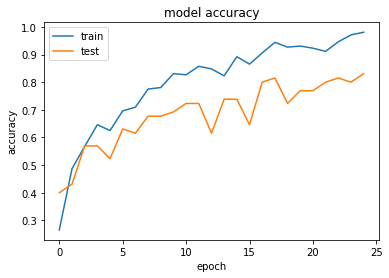

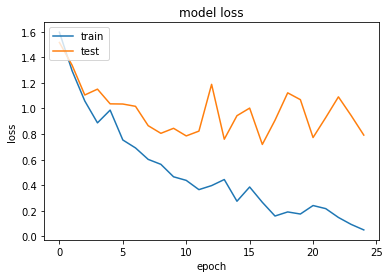

In [58]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

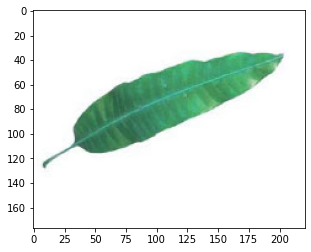

In [64]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [69]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((150, 150))) / 255.0
image_testing.shape

(150, 150, 3)

In [70]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 150, 150, 3)


In [71]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.17480318 0.20200309 0.22340165 0.19921148 0.20058055]]
['GMB_05']
